## Imports

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Initial Condition

In [42]:
T = 0.1
L = 1.0
alpha = 0.01
Nx = 50
Nt = 100
dx = L / (Nx - 1)
dt = T / Nt
learning_rate = 0.001
num_epochs = 500
noise_level = 0.05

## Our function

In [43]:
def initial_condition(x):
    return np.sin(np.pi * x)

## Construct the grids

In [44]:
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
X_grid, T_grid = np.meshgrid(x, t)

In [45]:
X_grid

array([[0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       ...,
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ]])

In [46]:
T_grid

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0010101, 0.0010101, 0.0010101, ..., 0.0010101, 0.0010101,
        0.0010101],
       [0.0020202, 0.0020202, 0.0020202, ..., 0.0020202, 0.0020202,
        0.0020202],
       ...,
       [0.0979798, 0.0979798, 0.0979798, ..., 0.0979798, 0.0979798,
        0.0979798],
       [0.0989899, 0.0989899, 0.0989899, ..., 0.0989899, 0.0989899,
        0.0989899],
       [0.1      , 0.1      , 0.1      , ..., 0.1      , 0.1      ,
        0.1      ]])

In [47]:
XT = np.hstack((X_grid.flatten()[:, None], T_grid.flatten()[:, None])) # 50 * 100 flatten this two grid to train our future model

'''
    | X grid | T grid |
        ...     ...
'''

XT

array([[0.        , 0.        ],
       [0.02040816, 0.        ],
       [0.04081633, 0.        ],
       ...,
       [0.95918367, 0.1       ],
       [0.97959184, 0.1       ],
       [1.        , 0.1       ]])

## Our initial function

In [48]:
u_initial = initial_condition(x)
u_initial

array([0.00000000e+00, 6.40702200e-02, 1.27877162e-01, 1.91158629e-01,
       2.53654584e-01, 3.15108218e-01, 3.75267005e-01, 4.33883739e-01,
       4.90717552e-01, 5.45534901e-01, 5.98110530e-01, 6.48228395e-01,
       6.95682551e-01, 7.40277997e-01, 7.81831482e-01, 8.20172255e-01,
       8.55142763e-01, 8.86599306e-01, 9.14412623e-01, 9.38468422e-01,
       9.58667853e-01, 9.74927912e-01, 9.87181783e-01, 9.95379113e-01,
       9.99486216e-01, 9.99486216e-01, 9.95379113e-01, 9.87181783e-01,
       9.74927912e-01, 9.58667853e-01, 9.38468422e-01, 9.14412623e-01,
       8.86599306e-01, 8.55142763e-01, 8.20172255e-01, 7.81831482e-01,
       7.40277997e-01, 6.95682551e-01, 6.48228395e-01, 5.98110530e-01,
       5.45534901e-01, 4.90717552e-01, 4.33883739e-01, 3.75267005e-01,
       3.15108218e-01, 2.53654584e-01, 1.91158629e-01, 1.27877162e-01,
       6.40702200e-02, 1.22464680e-16])

## Make some noise

In [49]:
u_initial_noisy = u_initial + noise_level * np.random.randn(*u_initial.shape)
u_initial_noisy

array([-0.07193954,  0.0843219 ,  0.12691273,  0.19552562,  0.24130132,
        0.25379235,  0.36249459,  0.42185862,  0.530109  ,  0.58429047,
        0.692701  ,  0.68439845,  0.68852462,  0.64333065,  0.66312544,
        0.84771005,  0.91179934,  0.93973831,  0.90102374,  0.9510308 ,
        0.97421745,  0.98282677,  0.97392642,  0.95203895,  0.97129409,
        0.96946978,  1.05678159,  0.98486904,  1.02416931,  0.95396899,
        0.87108059,  0.90982483,  0.93783431,  0.81907557,  0.86318188,
        0.80174746,  0.72939271,  0.75324649,  0.61121889,  0.5942479 ,
        0.57516307,  0.46761619,  0.51011882,  0.32097568,  0.23612417,
        0.21027247,  0.16321324,  0.24952915, -0.00823815, -0.09840669])

In [50]:
u_initial - u_initial_noisy

array([ 0.07193954, -0.02025168,  0.00096444, -0.00436699,  0.01235326,
        0.06131587,  0.01277242,  0.01202512, -0.03939145, -0.03875557,
       -0.09459047, -0.03617005,  0.00715793,  0.09694734,  0.11870604,
       -0.0275378 , -0.05665657, -0.05313901,  0.01338888, -0.01256238,
       -0.0155496 , -0.00789886,  0.01325536,  0.04334016,  0.02819212,
        0.03001644, -0.06140248,  0.00231274, -0.04924139,  0.00469886,
        0.06738783,  0.00458779, -0.051235  ,  0.0360672 , -0.04300963,
       -0.01991598,  0.01088529, -0.05756394,  0.0370095 ,  0.00386263,
       -0.02962817,  0.02310136, -0.07623508,  0.05429133,  0.07898405,
        0.04338211,  0.02794539, -0.12165199,  0.07230837,  0.09840669])

## Steps:
#### 1. Define the neural network model u_θ(x,t).
#### 2. Use automatic differentiation to compute the derivatives of u(x,t) with respect to x and t.
#### 3. Define the loss function that includes the data loss, PDE residual loss, and boundary condition loss.
#### 4. Train the neural network to minimize the loss function using an optimizer.

## Step 1: PINN Model

In [51]:
pinn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)), # Input layer with 2 inputs (x, t)
    tf.keras.layers.Dense(20, activation='tanh'), # Hidden layer with tanh activation function
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)  # Output layer
])

# optimizer как всегда адам
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# tanh => hyperbolic tangent =>  values in the range of [-1, 1]
# It provides the non-linearity, smoothness, and gradient properties that are well-suited to modeling complex physical processes described by differential equations.

## Step 2: ∂u(x,t)/∂t = α∂^2u(x,t)/∂x^2,
## Need to calculate the derivatives:
### 1. ∂u/∂t
### 2. ∂u/∂x
### 3. ∂²u/∂x²

## Step 3: Loss function that includes the data loss, PDE residual loss, and boundary condition loss
#### 1. PDE Residual loss: ∂u/∂t - alpha * ∂^2u/∂x^2 -> close to zero
#### 2. Data loss: check this -> u(x, 0) = sin(Pi * x) -> Checks how well the model meets the specified initial conditions
#### 3. Boundary condition loss: u(0, t) = u(1, t) = 0 -> fines the model if it violates them

In [56]:
def loss_function(model, inputs):
    x, t = inputs[:, 0:1], inputs[:, 1:2]

    x = tf.convert_to_tensor(x, dtype=tf.float32)
    t = tf.convert_to_tensor(t, dtype=tf.float32)

    with tf.GradientTape(persistent=True) as gradientTape:
        gradientTape.watch([x, t])
        u = model(tf.concat([x, t], axis=1))
        u_t = gradientTape.gradient(u, t)  # ∂u/∂t
        u_x = gradientTape.gradient(u, x)  # ∂u/∂x
    u_xx = gradientTape.gradient(u_x, x)  # ∂^2u/∂x^2
    del gradientTape

    # PDE -> ∂u/∂t - α∂^2u/∂^2
    pde_loss = tf.reduce_mean(tf.square(u_t - alpha * u_xx))

    # Initial condition loss -> u(x, 0) = sin(πx)
    u_initial_pred = model(tf.concat([x, tf.zeros_like(x)], axis=1))
    initial_loss = tf.reduce_mean(tf.square(u_initial_pred - initial_condition(x)))

    # Boundary condition loss -> u(0, t) = u(1, t) = 0
    boundary_loss = tf.reduce_mean(tf.square(model(tf.concat([tf.zeros_like(t), t], axis=1)))) + tf.reduce_mean(tf.square(model(tf.concat([tf.ones_like(t), t], axis=1))))

    # And sum to total loss to accept the error
    total_loss = pde_loss + initial_loss + boundary_loss
    return total_loss

## Training model and Every 100 epochs we will be display the loss

In [57]:
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(pinn_model, XT)
    gradients = tape.gradient(loss, pinn_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, pinn_model.trainable_variables))

    # display right here
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")

Epoch 0, Loss: 0.5929456353187561
Epoch 100, Loss: 0.19086354970932007
Epoch 200, Loss: 0.0055225989781320095
Epoch 300, Loss: 0.0022175286430865526
Epoch 400, Loss: 0.0009845903841778636


#### Epoch 0, Loss: 0.5929456353187561
#### Epoch 100, Loss: 0.19086354970932007
#### Epoch 200, Loss: 0.0055225989781320095
#### Epoch 300, Loss: 0.0022175286430865526
#### Epoch 400, Loss: 0.0009845903841778636 <- we see that, with help minimizing our loss function in this case is minimum

In [63]:
# Predict the temperature at t = 0.1 (to recover initial condition)
x_test = np.linspace(0, L, Nx)[:, None]
t_test = T * np.ones_like(x_test)
XT_test = np.hstack((x_test, t_test))
u_pred = pinn_model.predict(XT_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


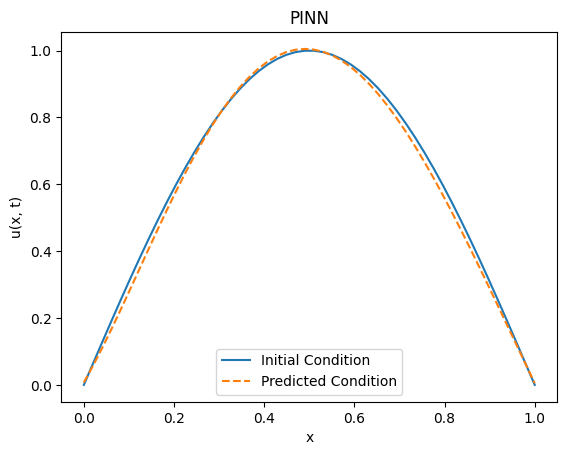

In [64]:
plt.plot(x_test, initial_condition(x_test), label='Initial Condition')
plt.plot(x_test, u_pred, label='Predicted Condition', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('PINN')
plt.show()

## Conclusion:
#### The PINN model has effectively learned the task of restoring the initial condition for the thermal conductivity equation. The two curves are almost exactly the same. Minor deviations are related to the use of noise in the data